# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in cleaned data for training and spray

In [2]:
spray_df = pd.read_csv("../../data/spray_clean.csv", parse_dates=['date'])
train_df = pd.read_csv("../../data/train_clean.csv", parse_dates=['date'])

## Spray data

In [3]:
spray_df.head()

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [4]:
spray_df.dtypes

date         datetime64[ns]
latitude            float64
longitude           float64
dtype: object

In [5]:
spray_df["year"] = spray_df["date"].dt.year
spray_df["year"].value_counts()

2013    12626
2011     1668
Name: year, dtype: int64

In [6]:
# Split the dataframe based on year
spray_df_2013 = spray_df[spray_df["year"] == 2013]
spray_df_2011 = spray_df[spray_df["year"] == 2011]

Plot the spray areas for different years to identify if there are common areas 

Text(0.5, 1.0, 'Location of sprays in 2013')

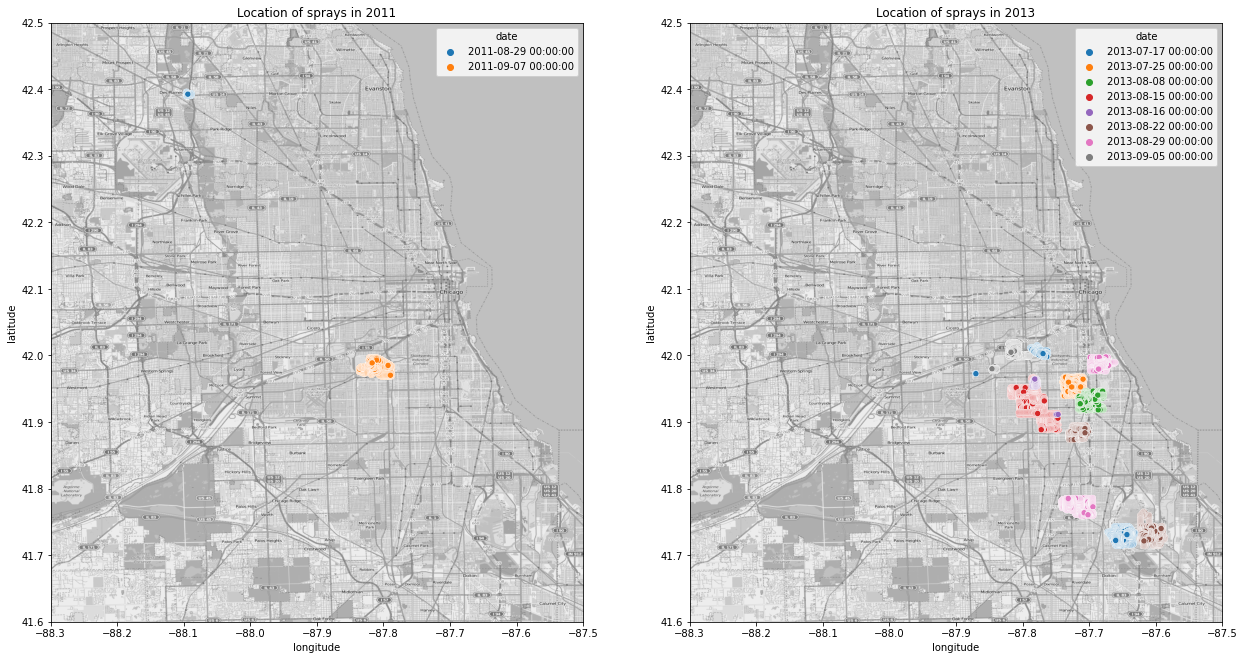

In [7]:
mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")

origin = [41.6, -88.3]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner
#rescales the image data to the GPS co-ordinates of the bounding box for Chicago defined by extent arguments

fig, ax = plt.subplots(1, 2, figsize = (21,15))
ax[0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2011, hue = 'date', ax = ax[0]);
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2013, hue = 'date', ax = ax[1]);

ax[0].set_title("Location of sprays in 2011")
ax[1].set_title("Location of sprays in 2013")

#plt.savefig('map.png')

In [8]:
spray_df.columns = [col.lower() for col in spray_df.columns]
spray_df.to_csv("../../data/spray_eng.csv", index=False)

## Train data

In [9]:
train_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [10]:
#check data types
train_df.dtypes

date                      datetime64[ns]
address                           object
species                           object
block                              int64
street                            object
trap                              object
addressnumberandstreet            object
latitude                         float64
longitude                        float64
addressaccuracy                    int64
nummosquitos                       int64
wnvpresent                         int64
dtype: object

In [11]:
train_df.shape

(10506, 12)

**Drop columns such as `address`, `block`, `street`, `trap` and `addressnumberandstreet` since we have lat lon columns.**

In [12]:
train_df.drop(["address", "block", "street", "addressnumberandstreet", "addressaccuracy"],
              axis = 1,
              inplace = True)

In [13]:
# Check the entries where wnv is present
train_df[train_df["wnvpresent"] == 1].head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent
553,2007-07-18,CULEX PIPIENS/RESTUANS,T215,41.686398,-87.531635,50,1
603,2007-07-25,CULEX PIPIENS/RESTUANS,T115,41.673408,-87.599862,50,1
611,2007-07-25,CULEX PIPIENS/RESTUANS,T115,41.673408,-87.599862,50,1
618,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,50,1
660,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,50,1


**Check if number of distinct traps is the same as distinct latitude and longitude combined to confirm if a same trap will always be on the same position**

In [14]:
train_df["lat_lon"] = train_df["latitude"].astype(str) + ", "+ train_df["longitude"].astype(str)

train_df["trap"].nunique(), train_df["lat_lon"].nunique()

(136, 138)

In [15]:
# Check duplicates
trap_latlon_df = pd.DataFrame(train_df[["trap","lat_lon"]].value_counts())
trap_latlon_df.columns = ["value_counts"]
trap_latlon_df.reset_index(inplace = True)

#Find entries with duplicates
trap_latlon_df[trap_latlon_df["trap"].duplicated()]

,trap,lat_lon,value_counts
88,T009,"41.98196400000001, -87.812827",31
97,T035,"41.836644, -87.677737",27


In [16]:
# Check the corresponding trap numbers
trap_latlon_df[ (trap_latlon_df["trap"] == "T009") | (trap_latlon_df["trap"] == "T035") ]

,trap,lat_lon,value_counts
57,T009,"41.99247800000001, -87.862995",80
78,T035,"41.763733, -87.742302",45
88,T009,"41.98196400000001, -87.812827",31
97,T035,"41.836644, -87.677737",27


In [17]:
# Check the corresponding date where it is placed for T009
t009_latlon_1 = "41.99247800000001, -87.862995"
t009_latlon_2 = "41.98196400000001, -87.812827"
train_df[(train_df["trap"] == "T009") &  ((train_df["lat_lon"] == t009_latlon_1) | (train_df["lat_lon"] == t009_latlon_2))]["date"]

50      2007-06-05
221     2007-07-02
312     2007-07-11
313     2007-07-11
714     2007-07-27
           ...    
10117   2013-09-06
10254   2013-09-12
10255   2013-09-12
10385   2013-09-19
10483   2013-09-26
Name: date, Length: 111, dtype: datetime64[ns]

In [18]:
# Check the corresponding date where it is placed for T035
t035_latlon_1 = "41.763733, -87.742302"
t035_latlon_2 = "41.836644, -87.677737"
train_df[(train_df["trap"] == "T035") & ((train_df["lat_lon"] == t035_latlon_1) | (train_df["lat_lon"] == t035_latlon_2)) ]["date"]

389     2007-07-11
513     2007-07-18
561     2007-07-19
759     2007-07-27
760     2007-07-27
           ...    
10288   2013-09-12
10289   2013-09-12
10405   2013-09-19
10406   2013-09-19
10501   2013-09-26
Name: date, Length: 72, dtype: datetime64[ns]

**To check West Nile Virus class representations, we cannot directly apply a value counts on the wnvpresent columns due to the existence of virus in multiple groups and speciies of mosquitoes being examined from the same date and trap. Value of 1 should be assigned to the trap/time if at least a group/specie of mosquitoes has been detected to contain the virus**

In [19]:
wnv_location_df = train_df.groupby(["date","lat_lon"]).agg({"nummosquitos": "sum", "wnvpresent": "max"})
#Rename the columns prior to combine
wnv_location_df.columns = ["totalmosquitos", "wnvpresent"]
wnv_location_df.reset_index(inplace = True)
wnv_location_df

,date,lat_lon,totalmosquitos,wnvpresent
0,2007-05-29,"41.688324, -87.676709",2,0
1,2007-05-29,"41.720848, -87.666014",3,0
2,2007-05-29,"41.731922, -87.677512",6,0
3,2007-05-29,"41.732984, -87.649642",1,0
4,2007-05-29,"41.862292, -87.64886",1,0
...,...,...,...,...
4611,2013-09-26,"41.98728, -87.666066",5,0
4612,2013-09-26,"41.991429, -87.747113",2,0
4613,2013-09-26,"41.99247800000001, -87.862995",1,0
4614,2013-09-26,"42.008314, -87.77792099999998",10,0


In [20]:
# Generate lat lon coordinates for plotting
wnv_location_df["latitude"] = wnv_location_df["lat_lon"].apply(lambda x: float(x.split(",")[0]))
wnv_location_df["longitude"] = wnv_location_df["lat_lon"].apply(lambda x: float(x.split(",")[1]))
wnv_location_df

,date,lat_lon,totalmosquitos,wnvpresent,latitude,longitude
0,2007-05-29,"41.688324, -87.676709",2,0,41.688324,-87.676709
1,2007-05-29,"41.720848, -87.666014",3,0,41.720848,-87.666014
2,2007-05-29,"41.731922, -87.677512",6,0,41.731922,-87.677512
3,2007-05-29,"41.732984, -87.649642",1,0,41.732984,-87.649642
4,2007-05-29,"41.862292, -87.64886",1,0,41.862292,-87.648860
...,...,...,...,...,...,...
4611,2013-09-26,"41.98728, -87.666066",5,0,41.987280,-87.666066
4612,2013-09-26,"41.991429, -87.747113",2,0,41.991429,-87.747113
4613,2013-09-26,"41.99247800000001, -87.862995",1,0,41.992478,-87.862995
4614,2013-09-26,"42.008314, -87.77792099999998",10,0,42.008314,-87.777921


In [21]:
# Create year, month, week columns for subsequent plotting
wnv_location_df["year"] = wnv_location_df["date"].dt.year
wnv_location_df["month"] = wnv_location_df["date"].dt.month
wnv_location_df["week"] = wnv_location_df["date"].dt.isocalendar().week

In [22]:
wnv_location_df_2007 = wnv_location_df[wnv_location_df["year"] == 2007]
wnv_location_df_2009 = wnv_location_df[wnv_location_df["year"] == 2009]
wnv_location_df_2011 = wnv_location_df[wnv_location_df["year"] == 2011]
wnv_location_df_2013 = wnv_location_df[wnv_location_df["year"] == 2013]

**Plot the total mosquitoes count across the years in one single graph**

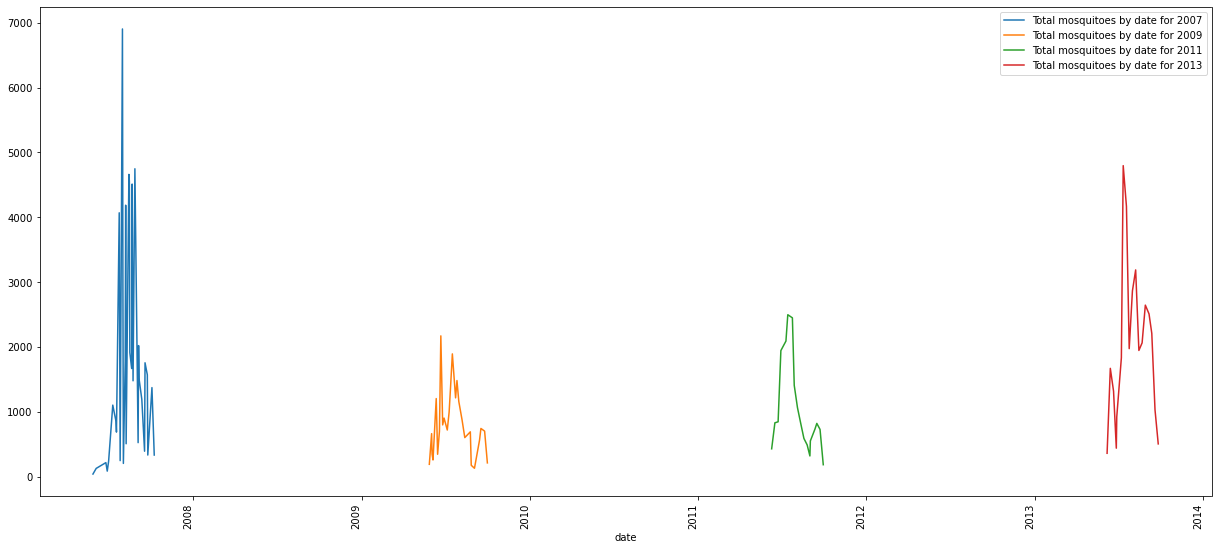

In [23]:
# Count how many of such species
fig, ax  = plt.subplots(figsize = (21,10))
wnv_location_df_2007.groupby("date")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2009.groupby("date")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2011.groupby("date")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2013.groupby("date")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
ax.legend(['Total mosquitoes by date for 2007',
           'Total mosquitoes by date for 2009',
           'Total mosquitoes by date for 2011',
           'Total mosquitoes by date for 2013']);

In [24]:
wnv_location_df_2007

,date,lat_lon,totalmosquitos,wnvpresent,latitude,longitude,year,month,week
0,2007-05-29,"41.688324, -87.676709",2,0,41.688324,-87.676709,2007,5,22
1,2007-05-29,"41.720848, -87.666014",3,0,41.720848,-87.666014,2007,5,22
2,2007-05-29,"41.731922, -87.677512",6,0,41.731922,-87.677512,2007,5,22
3,2007-05-29,"41.732984, -87.649642",1,0,41.732984,-87.649642,2007,5,22
4,2007-05-29,"41.862292, -87.64886",1,0,41.862292,-87.648860,2007,5,22
...,...,...,...,...,...,...,...,...,...
1454,2007-10-09,"41.72646500000001, -87.585413",32,0,41.726465,-87.585413,2007,10,41
1455,2007-10-09,"41.729669, -87.582699",4,0,41.729669,-87.582699,2007,10,41
1456,2007-10-09,"41.737052, -87.54306700000002",4,0,41.737052,-87.543067,2007,10,41
1457,2007-10-09,"41.740641, -87.546587",40,0,41.740641,-87.546587,2007,10,41


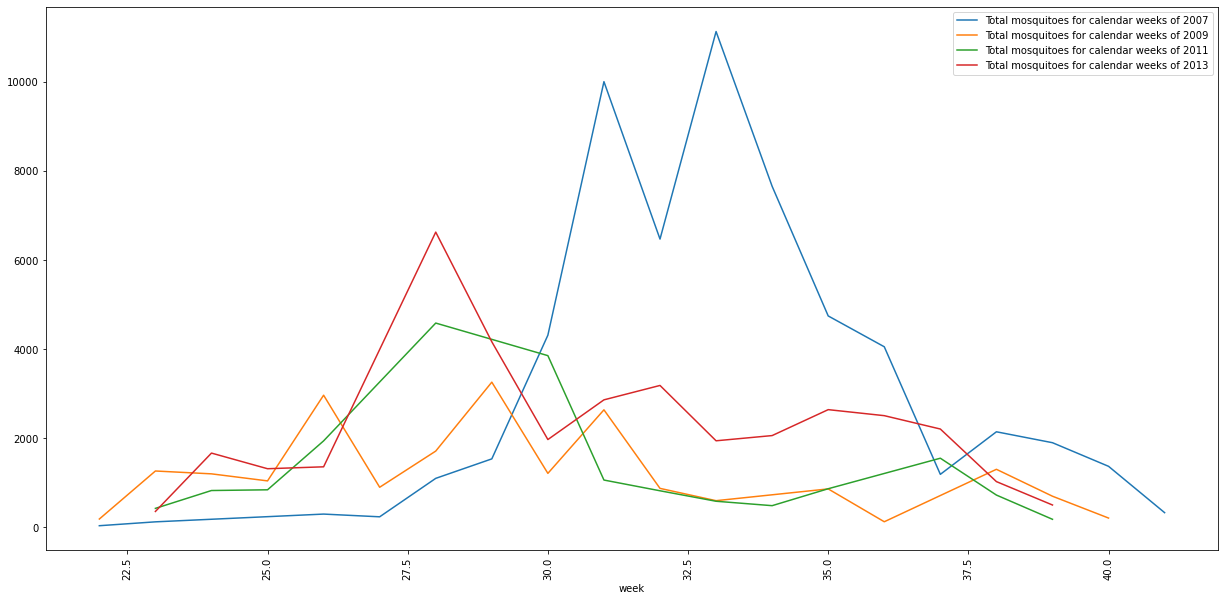

In [25]:
# Count how many mosquitoes per week for each year and overlay for comparison
fig, ax  = plt.subplots(figsize = (21,10))
wnv_location_df_2007.groupby("week")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2009.groupby("week")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2011.groupby("week")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
wnv_location_df_2013.groupby("week")["totalmosquitos"].sum().plot(kind = "line", ax = ax, rot = 90);
ax.legend(['Total mosquitoes for calendar weeks of 2007',
           'Total mosquitoes for calendar weeks of 2009',
           'Total mosquitoes for calendar weeks of 2011',
           'Total mosquitoes for calendar weeks of 2013']);

Plot locations where west nile virus occurred for each year.

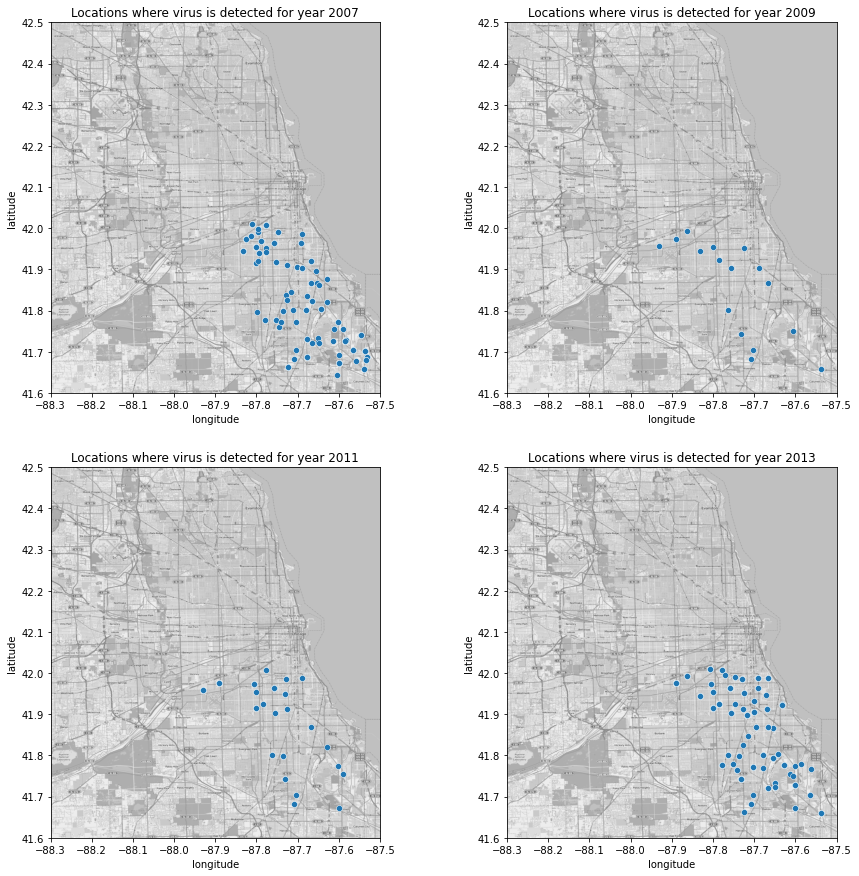

In [26]:
# Plot locations where 
mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")

origin = [41.6, -88.3]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]         # lat/long of upper right corner
#rescales the image data to the GPS co-ordinates of the bounding box for Chicago defined by extent arguments

fig, ax = plt.subplots(2, 2, figsize = (15,15))
ax[0,0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude",
                y = "latitude",
                data= wnv_location_df_2007[wnv_location_df_2007["wnvpresent"] == 1],
                ax = ax[0,0]);
ax[0,0].set_title("Locations where virus is detected for year 2007")

ax[0,1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude",
                y = "latitude",
                data= wnv_location_df_2009[wnv_location_df_2009["wnvpresent"] == 1],
                ax = ax[0,1]);
ax[0,1].set_title("Locations where virus is detected for year 2009")

ax[1,0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude",
                y = "latitude",
                data= wnv_location_df_2011[wnv_location_df_2011["wnvpresent"] == 1],
                ax = ax[1,0]);
ax[1,0].set_title("Locations where virus is detected for year 2011")

ax[1,1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude",
                y = "latitude",
                data= wnv_location_df_2013[wnv_location_df_2013["wnvpresent"] == 1],
                ax = ax[1,1],
               );
ax[1,1].set_title("Locations where virus is detected for year 2013");

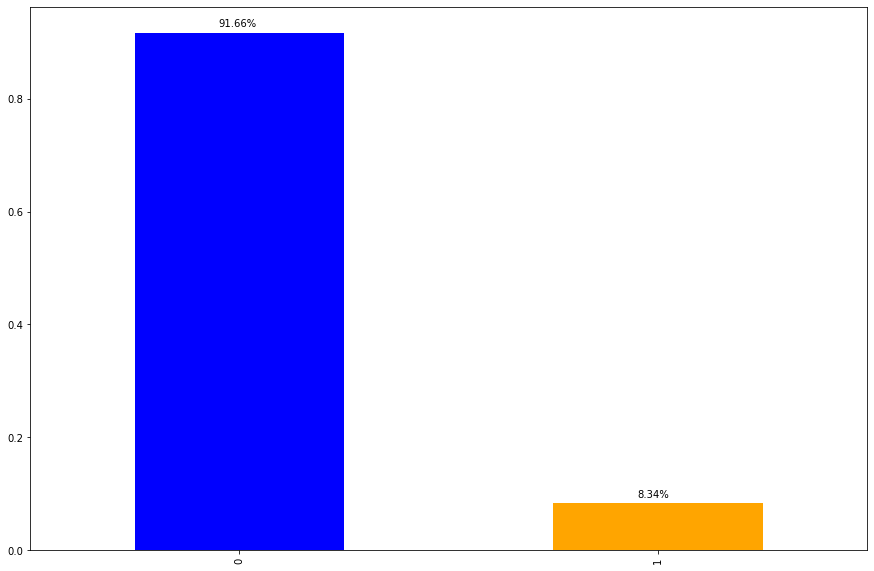

In [27]:
# Plot out the proportionality of wnvpresent based on entries of each date and lat lon
fig, ax  = plt.subplots(figsize = (15,10))
wnv_location_df["wnvpresent"].value_counts(normalize = True).plot(kind = "bar", ax = ax, color = ["blue", "orange"])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + 0.4*i.get_width(), height + 0.01,'{:.2f}{}'.format(height*100,'%'))

**For each date and location, calculate the total number of mosquitoes for each species and identify the species of mosquitoes which contains West Nile virus.**

In [28]:
total_mosquitoes = train_df.groupby(["date","species","lat_lon"]).agg({"nummosquitos": "sum", "wnvpresent": "max"})
#Rename the columns prior to combine
total_mosquitoes.columns = ["totalmosquitos", "wnvpresent"]
total_mosquitoes.reset_index(inplace = True)
total_mosquitoes.head()

,date,species,lat_lon,totalmosquitos,wnvpresent
0,2007-05-29,CULEX PIPIENS,"41.731922, -87.677512",1,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,"41.688324, -87.676709",1,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,"41.867108, -87.654224",1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,"41.891126, -87.61156",1,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,"41.919343, -87.694259",1,0


In [29]:
common_columns = ["date", "species", "lat_lon"]
# Drop the existing wnvpresent in favor of using the wnvpresent column in above dataframe
train_df.drop(["wnvpresent","nummosquitos"], axis = 1, inplace = True)
train_df_merged = pd.merge(total_mosquitoes, train_df, on = common_columns)
train_df_merged.drop_duplicates(inplace = True)

In [30]:
train_df_merged.shape

(8475, 8)

In [31]:
train_df_merged["year"] = wnv_location_df["date"].dt.year
train_df_merged["month"] = wnv_location_df["date"].dt.month
train_df_merged["week"] = wnv_location_df["date"].dt.isocalendar().week


train_df_merged_2007 = train_df_merged[train_df_merged["year"] == 2007]
train_df_merged_2009 = train_df_merged[train_df_merged["year"] == 2009]
train_df_merged_2011 = train_df_merged[train_df_merged["year"] == 2011]
train_df_merged_2013 = train_df_merged[train_df_merged["year"] == 2013]

Plot out the counts for each species of mosquitoes

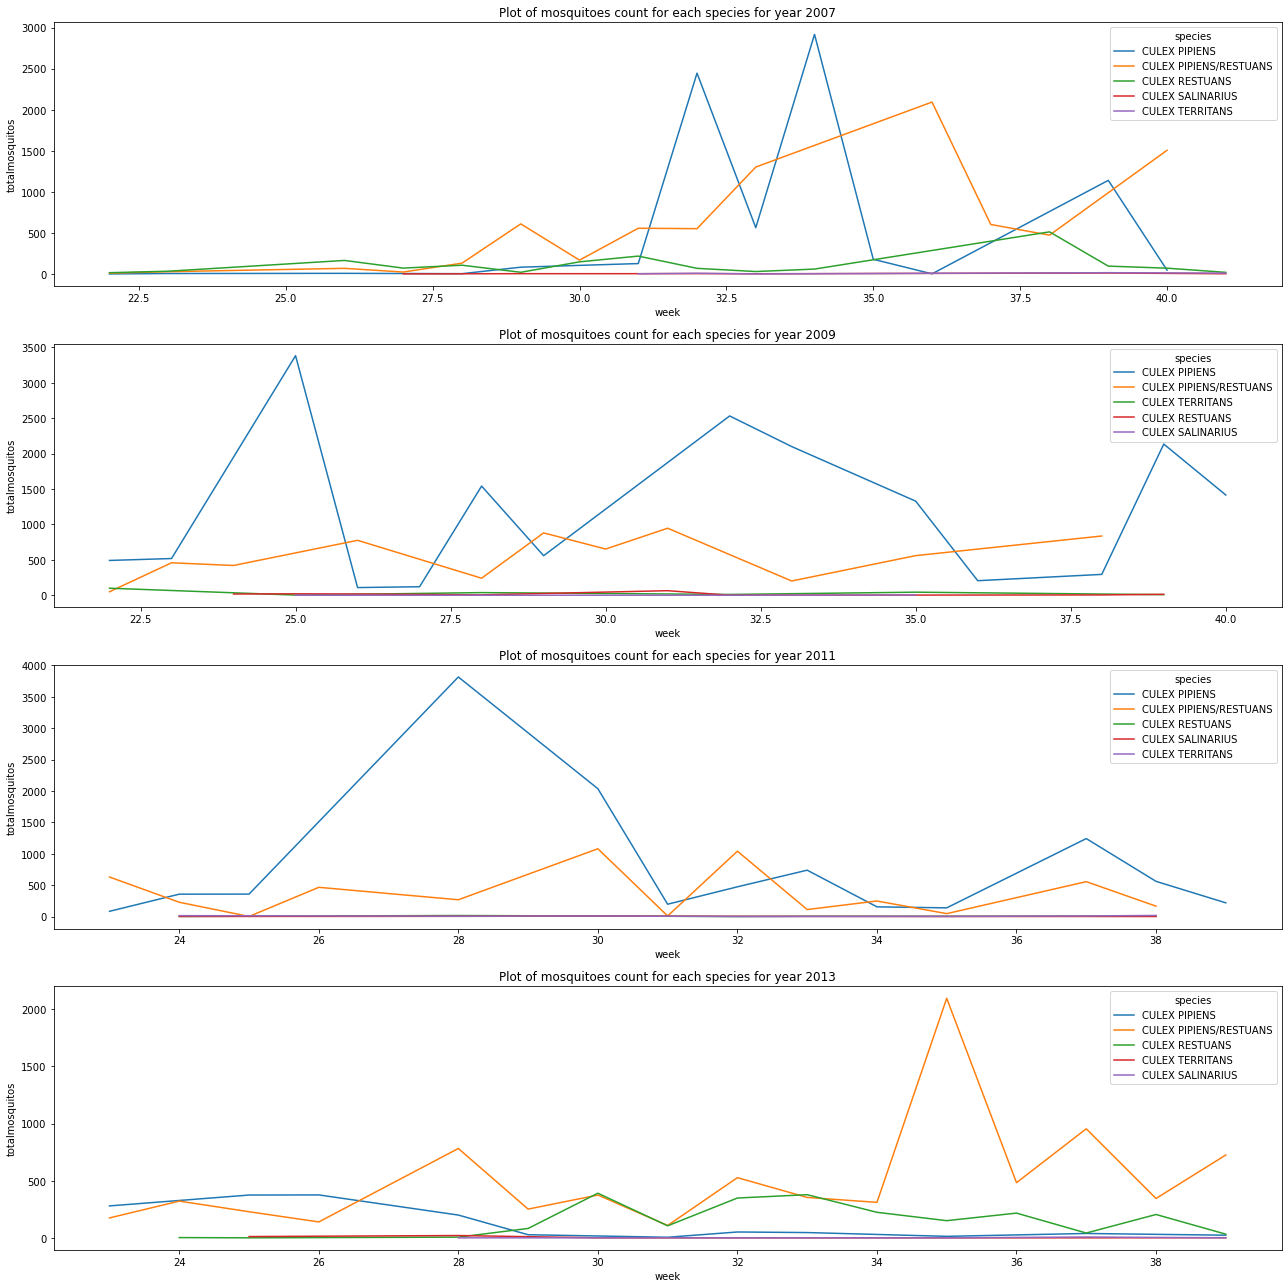

In [32]:
fig, ax  = plt.subplots(4,1,figsize = (18,18))

train_2007 = train_df_merged_2007.groupby(["week","species"], as_index = False).sum()
train_2009 = train_df_merged_2009.groupby(["week","species"], as_index = False).sum()
train_2011 = train_df_merged_2011.groupby(["week","species"], as_index = False).sum()
train_2013 = train_df_merged_2013.groupby(["week","species"], as_index = False).sum()

sns.lineplot(x = 'week', y = 'totalmosquitos', hue = 'species', data = train_2007, ax = ax[0], )
sns.lineplot(x = 'week', y = 'totalmosquitos', hue = 'species', data = train_2009, ax = ax[1])
sns.lineplot(x = 'week', y = 'totalmosquitos', hue = 'species', data = train_2011, ax = ax[2])
sns.lineplot(x = 'week', y = 'totalmosquitos', hue = 'species', data = train_2013, ax = ax[3]);

ax[0].set_title("Plot of mosquitoes count for each species for year 2007");
ax[1].set_title("Plot of mosquitoes count for each species for year 2009");
ax[2].set_title("Plot of mosquitoes count for each species for year 2011");
ax[3].set_title("Plot of mosquitoes count for each species for year 2013");

plt.tight_layout()

Check the location of traps and mark out location 

In [33]:
# Drop unnecessary columns and save to csv file
train_df_merged.drop(["lat_lon","year","month","week"], axis = 1, inplace = True)
train_df_merged.to_csv("../../data/train_eng.csv", index=False )